<a href="https://colab.research.google.com/github/piliroberta/Multiscala_progetto/blob/main/Multiscala_progetto_robi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/piliroberta/Multiscala_progetto
!mv Multiscala_progetto/mini_vuoto/* .

fatal: destination path 'Multiscala_progetto' already exists and is not an empty directory.
mv: cannot stat 'Multiscala_progetto/mini_vuoto/*': No such file or directory


In [ ]:
!cd Multiscala_progetto

In [1]:
#@title Increase the output length 
from notebook.services.config import ConfigManager
cm = ConfigManager().update('notebook', {'limit_output': 10000000})

In [2]:
#@title Installing GROMACS and related packages
!apt install gromacs &> /dev/null
!apt install dssp &> /dev/null
!ln -s /usr/bin/dssp /usr/local/bin/dssp
!apt install ghostscript &> /dev/null

In [ ]:
#@title Installing NGLview
!pip install nglview  &> /dev/null
!pip install simpletraj  &> /dev/null
!pip install mdanalysis &> /dev/null
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
!mkdir cady_mini

In [ ]:
import nglview as nv
with open("Multiscala_progetto/cady_1.pdb") as f:
    view = nv.show_file(f, ext="pdb")
view

NGLWidget()

In [ ]:
!gmx pdb2gmx -f cady_1.pdb -p cady_mini/cady_1.top -o cady_mini/cady_1.gro -ff amber99sb-ildn  -ignh -heavyh 

             :-) GROMACS - gmx pdb2gmx, 2020.1-Ubuntu-2020.1-1 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project leader

In [ ]:
!gmx editconf -f cady_mini/cady_1.gro -o cady_mini/dodecahedron.gro -c -d 0.6 -bt dodecahedron 

             :-) GROMACS - gmx editconf, 2020.1-Ubuntu-2020.1-1 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project leade

In [ ]:
!gmx grompp -f template.mdp -c cady_mini/dodecahedron.gro -p cady_mini/cady_1.top -o cady_mini/cady_1.tpr -maxwarn 2

              :-) GROMACS - gmx grompp, 2020.1-Ubuntu-2020.1-1 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project leader

In [ ]:
!gmx mdrun -s cady_mini/cady_1.tpr -deffnm cady_mini/cadyvmin -v  -nb cpu

              :-) GROMACS - gmx mdrun, 2020.1-Ubuntu-2020.1-1 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project leaders

In [ ]:
! echo -e "Potential \n 0" | gmx energy -f cady_mini/cadyvmin.edr -o cady_mini/potential.xvg

              :-) GROMACS - gmx energy, 2020.1-Ubuntu-2020.1-1 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project leader

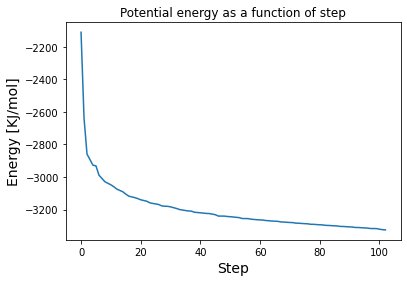

In [ ]:
import matplotlib.pyplot as plt # Import from the library matplotlib  the package pyplot and alias it as plt 
import numpy as np #import the library numpy and alias it as np
'''load the data from the potential.xvg format into data, ...
define the comments as raw starting with either # or @'''
data=np.loadtxt("cady_mini/potential.xvg",comments=["#","@"])
step=data[:,0] #assign the first column of data to the variable step
energy=data[:,1] #assign the second column of data to the variable potential
plt.plot(step,energy) #plot the function potential(data)
plt.xlabel("Step",size=14) #assign the x label 
plt.ylabel("Energy [KJ/mol]",size=14) #assign the y label
plt.title("Potential energy as a function of step"); #assign a title 
#save the figure in png format with a resolution of 300 dot per inch "dpi" 
plt.savefig("potential_steep_w.png",format="png", dpi=300)

In [ ]:
!mkdir cady_din

In [ ]:
!mv template.mdp template_min.mdp

In [ ]:
!mv template_min.mdp cady_mini

In [ ]:
!gmx grompp -f cady_din/template_D.mdp -p cady_mini/cady_1.top -c cady_mini/cadyvmin.gro  -o cady_din/cadyv_D.tpr -maxwarn 2

              :-) GROMACS - gmx grompp, 2020.1-Ubuntu-2020.1-1 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project leader

In [ ]:
!mv template.mdp template_D.mdp

In [ ]:
!mv template_D.mdp cady_din

In [ ]:
!gmx mdrun -deffnm cady_din/cadyv_D -s cady_din/cadyv_D.tpr -v -nt 12

              :-) GROMACS - gmx mdrun, 2020.1-Ubuntu-2020.1-1 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project leaders

In [ ]:
!echo -e "Temperature" | gmx energy -f cady_din/cadyv_D.edr -o cady_din/Temp_cadyv.xvg 

              :-) GROMACS - gmx energy, 2020.1-Ubuntu-2020.1-1 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project leader

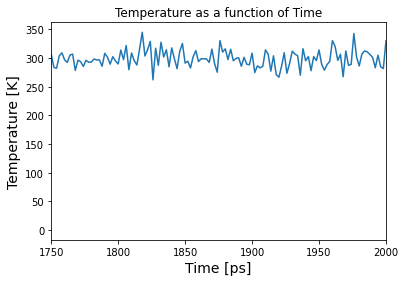

In [10]:
import matplotlib.pyplot as plt # Import from the library matplotlib  the package pyplot and alias it as plt 
import numpy as np #import the library numpy and alias it as np
'''load the data from the potential.xvg format into data, ...
define the comments as raw starting with either # or @'''
data=np.loadtxt("Temp_cadyv.xvg",comments=["#","@"])
step=data[:,0] #assign the first column of data to the variable step
energy=data[:,1] #assign the second column of data to the variable potential
plt.plot(step,energy) #plot the function potential(data)
plt.xlabel("Time [ps]",size=14) #assign the x label 
plt.ylabel("Temperature [K]",size=14) #assign the y label
plt.title("Temperature as a function of Time"); #assign a title 
plt.xlim(1750,2000)
#save the figure in png format with a resolution of 300 dot per inch "dpi" 
plt.savefig("Temperatura1.png",format="png", dpi=300)

In [5]:
! echo -e "0 \n" | gmx trjconv -s cadyv_D.tpr -f cadyv_D.trr -pbc mol -o cadyv_D_conv.trr -ur compact

             :-) GROMACS - gmx trjconv, 2020.1-Ubuntu-2020.1-1 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project leader

In [6]:
! echo -e "0 \n" | gmx trjconv -s cadyv_D.tpr -f cadyv_D_conv.trr -pbc mol -o cadyv_D_conv.gro -ur compact

             :-) GROMACS - gmx trjconv, 2020.1-Ubuntu-2020.1-1 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project leader

In [11]:
!cat Temp_cadyv.xvg

# This file was created Sat Mar  4 18:20:48 2023
# Created by:
#              :-) GROMACS - gmx energy, 2020.1-Ubuntu-2020.1-1 (-:
# 
# Executable:   /usr/bin/gmx
# Data prefix:  /usr
# Working dir:  /content
# Command line:
#   gmx energy -f cady_din/cadyv_D.edr -o cady_din/Temp_cadyv.xvg
# gmx energy is part of G R O M A C S:
#
# GROtesk MACabre and Sinister
#
@    title "GROMACS Energies"
@    xaxis  label "Time (ps)"
@    yaxis  label "(K)"
@TYPE xy
@ view 0.15, 0.15, 0.75, 0.85
@ legend on
@ legend box on
@ legend loctype view
@ legend 0.78, 0.8
@ legend length 2
@ s0 legend "Temperature"
    0.000000    0.128038
    2.000000  291.650665
    4.000000  274.556549
    6.000000  314.769531
    8.000000  291.098999
   10.000000  282.556274
   12.000000  318.529327
   14.000000  271.380859
   16.000000  313.596893
   18.000000  313.496552
   20.000000  293.303009
   22.000000  282.614746
   24.000000  322.329163
   26.000000  304.107208
   28.000000  309.578003
   30.000000  303.855194

In [35]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [66]:
comm=["#","@"]
temperature=np.loadtxt(f"Temp_cadyv.xvg",usecols=(1),comments=comm) 
v=temperature[875:-1]
print(v)


[306.788147 283.780151 282.310822 303.838226 309.164062 297.028931
 292.480804 305.093628 307.004395 278.419525 296.492401 293.574066
 285.443573 296.110321 292.66214  293.075806 298.438202 296.734375
 296.96109  285.743011 308.312164 301.696198 289.462311 302.497101
 294.978241 289.80249  314.065857 297.239777 322.07196  279.752167
 308.920715 295.439972 288.022217 316.192047 345.116577 303.678162
 314.788544 329.24292  262.036255 317.231781 287.394928 327.707428
 301.853943 314.453033 284.82074  317.798859 298.671173 281.559143
 312.004303 325.605865 291.247528 294.522705 282.688751 302.484833
 312.947571 293.918457 298.954315 298.745636 298.564423 292.426514
 315.663666 290.410614 275.374573 330.556244 310.579773 316.138702
 297.469757 315.462555 295.329926 299.524353 300.54422  285.762909
 301.394897 289.384155 288.368439 308.674774 274.870789 286.400848
 282.902069 285.650574 314.319366 306.763916 277.326538 303.967896
 271.574127 266.497803 285.445557 309.371063 273.539001 290.60

cat: v: No such file or directory
